# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('product_sales.csv')

# Data Validation

In [3]:
df.head()

week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]

In [4]:
df.describe()

week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...           0.000000       12.000000
25%        2.000000      9.000000  ...           1.000000       23.000000
50%        3.000000     10.000000  ...           3.000000       25.000000
75%        5.000000     11.000000  ...           7.000000       27.000000
max        6.000000     16.000000  ...          63.000000       41.000000

[8 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
print(df['week'].dtype)
print(df['week'].isnull().sum())
print(df['week'].value_counts())

int64
0
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64


### Column 'week' is the right type and there are no null values. No changes to make 

In [7]:
print(df['sales_method'].dtype)
print(df['sales_method'].isnull().sum())
print(df['sales_method'].value_counts())

object
0
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [8]:
df['sales_method'] = df['sales_method'].replace('email','Email').replace('em + call', 'Email + Call')

In [9]:
print(df['sales_method'].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


We had to change the typo erros in the column 'sales_method' to make it uniform and keep only one version of each contact method used.

### Column 'sales_method' OK

In [10]:
print(df['customer_id'].dtype)
print(df['customer_id'].isnull().sum())
print(df['customer_id'].duplicated().sum())

object
0
0


### Column 'customer_id' has no null values, no duplicates values, and is the right type.

In [11]:
print(df['nb_sold'].dtype)
print(df['nb_sold'].isnull().sum())
print(df['nb_sold'].value_counts())
df['nb_sold'].describe()

int64
0
10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64


count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64

### column 'nb_sold' has no null values, and is the right type.

In [12]:
print(df['revenue'].dtype)
print(df['revenue'].isnull().sum())
print(df['revenue'].value_counts())

float64
1074
51.86     11
52.51     10
53.25     10
52.68      9
51.71      9
          ..
187.37     1
86.37      1
125.97     1
182.53     1
64.90      1
Name: revenue, Length: 6743, dtype: int64


### There are null values

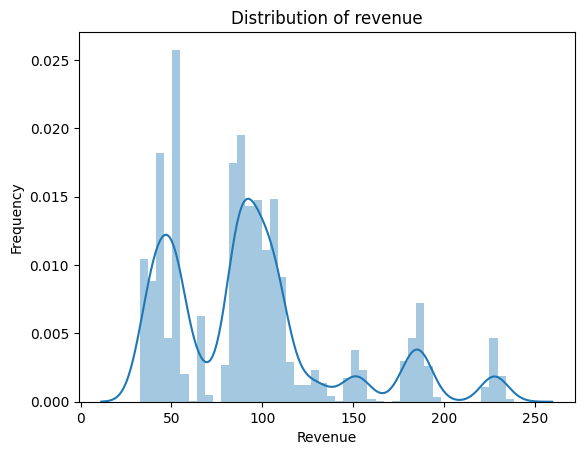

In [13]:
sns.distplot(df['revenue'],kde = True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of revenue')
plt.show()

### We can see that the distribution is skewed to the right so we will replace missing values with median.

In [14]:
median_revenue = df['revenue'].median()

In [15]:
df['revenue'].fillna(median_revenue, inplace = True)

### Column 'revenue' ok 

In [16]:
print(df['years_as_customer'].dtype)
print(df['years_as_customer'].isna().sum())
print(df['years_as_customer'].describe())

int64
0
count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64


### There are wrong values

<AxesSubplot: xlabel='years_as_customer', ylabel='Density'>

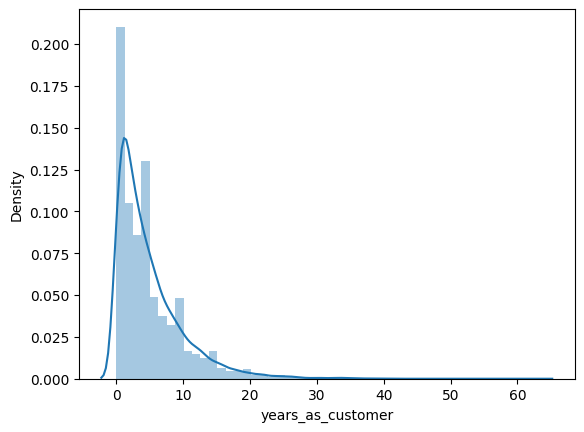

In [17]:
sns.distplot(df['years_as_customer'],kde = True)

### We want to replace the values that are greater than the creation of the company with the median value year as customer value

In [18]:
df[df['years_as_customer'] > 39].value_counts()

week  sales_method  customer_id                           nb_sold  revenue  years_as_customer  nb_site_visits  state     
2     Email         18919515-a618-430c-9a05-2c7d8fea96af  10       97.22    63                 24              California    1
4     Call          2ea97d34-571d-4e1b-95be-fea1c404649f  10       50.47    47                 27              California    1
dtype: int64

In [19]:
median_years_as_customer = df['years_as_customer'].median()

In [20]:
df['years_as_customer'].replace({63:median_years_as_customer, 47:median_years_as_customer}, inplace = True)

### Column 'years_as_customer' OK

In [21]:
print(df['nb_site_visits'].dtype)
print(df['nb_site_visits'].isna().sum())
df['nb_site_visits'].describe()

int64
0


count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64

### Column 'nb_site_visits' is the good type and has no null values 

In [22]:
print(df['state'].dtype)
print(len(df['state'].value_counts()))
print(df['state'].value_counts())


object
50
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
R

### Column 'state' is the good type and has no null values.

# Exploratory Data Analysis

In [23]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("talk")

## How many customers were there for each approach?

In [24]:
pivot_table = pd.pivot_table(df, index='sales_method', aggfunc='size', fill_value=0)
pivot_table_proportions = pivot_table.div(pivot_table.sum(axis=0), axis=0)

In [25]:
print(pivot_table)
print(pivot_table_proportions)

sales_method
Call            4962
Email           7466
Email + Call    2572
dtype: int64
sales_method
Call            0.330800
Email           0.497733
Email + Call    0.171467
dtype: float64


Text(0.5, 1.0, 'Total Customers Per Sales Method')

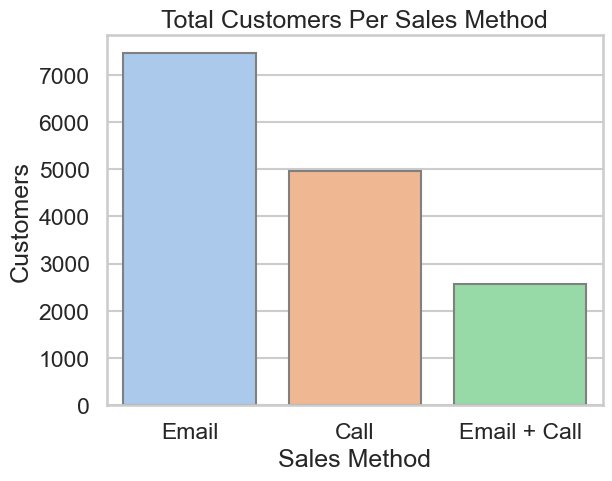

In [26]:
df_customer_sales_method = df.groupby('sales_method')['customer_id'].count().reset_index()

sns.barplot(data=df_customer_sales_method,
            x='sales_method',
            y='customer_id',
            order = ['Email','Call','Email + Call'],
            edgecolor="grey")

plt.xlabel('Sales Method')
plt.ylabel('Customers')
plt.title('Total Customers Per Sales Method')

We can see that the Email sales method has the most customers with around 7466 customers and the Email + Call sales method has the least with around 2572 customers so the sales_method proportions is not exactly balanced and it could lead to some bad conclusion looking just at the bar graph. 

## Spread of Revenue Overall

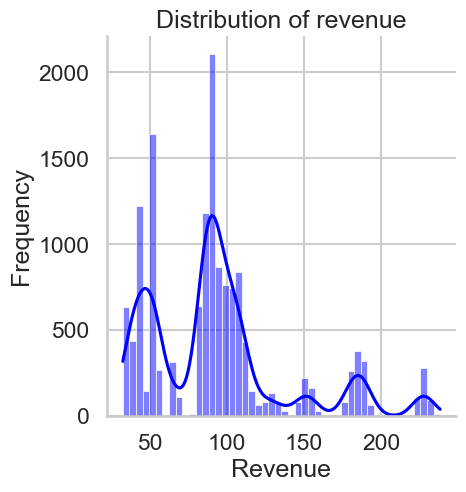

In [27]:
sns.displot(data = df, x = 'revenue', kde=True, color = 'b')



plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of revenue')
plt.show()

We can see that the distribution does not approach a normal distribution with it being skewed to the righ. The median is around 90. There are a few really good sales at around 225, as well as a few peaks of sales around 190.

## Spread of revenue for each Sales method

Text(0, 0.5, 'Revnenue')

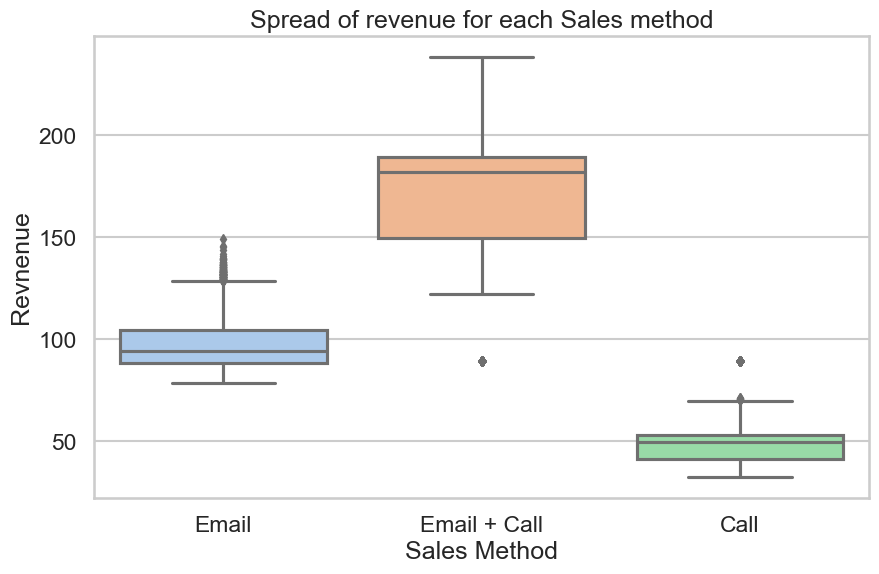

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x='sales_method', y='revenue', data=df)

plt.title('Spread of revenue for each Sales method')
plt.xlabel('Sales Method')
plt.ylabel('Revnenue')


Here we can clearly see that the Email + Call is the most efficient sales_method at generating revenue with a median revenue of around 180 compared to the second most efficent sales_method 'Email' that has a median value of around 90. We can say also that there is greater variability in sales revenue for the Email + Call sales mehtod compared to the two other sales_method indicating that the combinasion of both calls and emails are working to make customer buy more.

## Was there any difference in revenue over time for each of the methods?

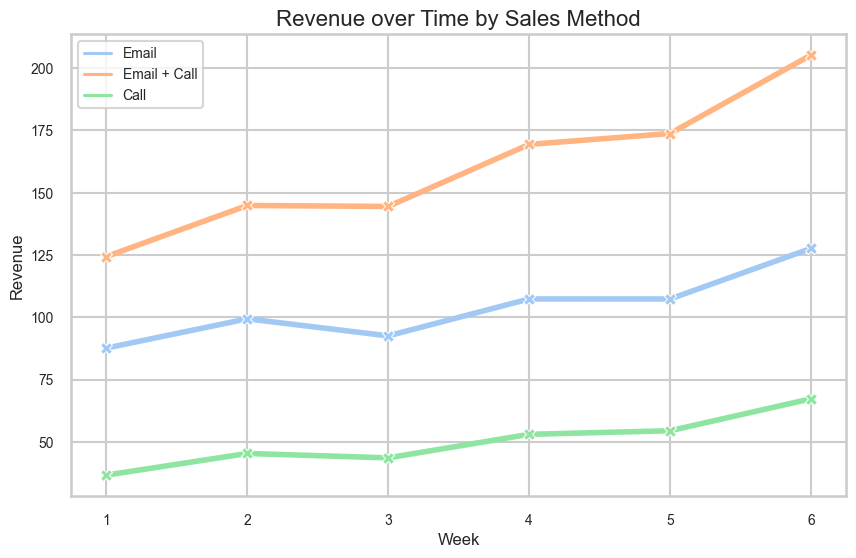

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data = df, x = 'week', y = 'revenue',hue='sales_method',ci = None,linewidth=4, marker="X", markersize=9)

plt.title("Revenue over Time by Sales Method", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)


plt.show()

we can see that Email + Call sales methods saw the greatest improvements over 6 weeks by close to doubling revenue, compared to Email seeing some improvements.

Based on the analysis of the line plot and the spread of revenue per sales method, it can be recommended that the Email + Call method is the best method. The line plot indicates that this method consistently generates higher revenue over time and grows faster compared to the other methods. Additionally, the boxplot shows that the revenue spread for the Email + Call method although it is less consistent, it indicates that the revenue generated by this method is greater. Therefore, Pens and Printers may want to consider using the Email + Call method as a preferred sales method to maximize revenue and maintain consistent revenue generation.

# How should the business monitor what they want to achieve?
To monitor what they want to achieve, Pens and Printers should set up a system to regularly track and analyze their sales metrics, particularly those related to revenue generated by the Email + Call sale method. They should establish benchmarks based on the analysis of the data, such as the median revenue and revenue spread, and monitor these metrics over time to identify any trends or potential issues.

# Estimate the initial value(s) for the metric based on the current data:
The initial value we will want to monitor will be the median revenue of around 180 for the Email + Call sales method to make sure it is going in the right direction as well as the spread of the sale method check if it becomes narrower so it becomes more consistent. 
Also, we want to look at the revenue over time and make sure it continues to almost double over a 6 week period.

# Summary 
In summary, Pens and Printers should consider using the Email + Call sales method as a preferred sales method and take the extra time to adopt both practices because we can see that the revenue generated by this sales method is doubled the other sales method. They should also monitor its performance through tracking revenue generated by this sale method, comparing it with benchmarks, and monitoring revenue spread. Focusing on the median revenue of approximately $180, narrowing the revenue spread, and aiming for almost doubling revenue over a six-week period for the Email + Call sales method will be crucial in ensuring continued growth and success for the business. By doing so, Pens and Printers can make informed decisions about allocating resources and optimizing its sales strategy to achieve its revenue goals.